Sascha Spors, Professorship Signal Theory and Digital Signal Processing, Institute of Communications Engineering (INT), Faculty of Computer Science and Electrical Engineering (IEF), University of Rostock, Germany

# Selected Topics in Audio Signal Processing - Exercises



The notebooks and all additional files should be considered as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). The text is licensed under Creative Commons Attribution 4.0, the code of the IPython examples under the MIT license.

# Farfield Directivity of an Uniform Linear Array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.umath_tests import inner1d
from numpy.fft import fft, fftshift

/Users/fs446/opt/anaconda3/envs/mystiasp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
def plot_ula_farfield_directivity(x, phi_steer, w, c=343):
    """Calculate and plot the farfield directivity of steered ULA.
    x: (N, 2), 2D array of element positions on y axis
    phi_steer: sterring angle in deg
    w: angular frequency in rad/s
    c = 343  # m/s, speed of sound
    
    this function derives the directivity H numerically from
    1.) DFT of weights
    2.) -> DTFT interpolation of DFT over spatial frequency ky
    3.) getting as many circle rounds as required to fill visible region
    4.) cut out visible region
    5.) plot |H| over ky
    6.) plot 20lg|H| over phi as polar and normal 2D
    7.) plot ULA geometry
    """
    kys = 2*np.pi/dy
    w_c = w/c

    k_steer = w/c * np.array([np.cos(phi_steer/180*np.pi),
                              np.sin(phi_steer/180*np.pi)])
    k_steer = k_steer[:, np.newaxis].T

    print('interelement delay for the delay-and-sum beamforming processing')
    if phi_steer < 0:
        tau = -k_steer[0, 1]*dy/w*1000
    else:
        tau = +k_steer[0, 1]*dy/w*1000
    print('tau = {0:f} ms'.format(tau))

    # array weights for delay-and-sum for the chosen frequency w
    h = np.exp(+1j*inner1d(x, k_steer))

    # calc a DTFT-like spectrum which is the base for the polar pattern
    Nz = 2**8 * N  # large zeropadding -> high res DFT -> interpolation -> DTFT
    H_base = fftshift(fft(h, n=Nz)) / N  # normalize polar pattern to 1
    ky_base = np.arange(Nz) / Nz * kys - kys/2  # baseband frequency

    # variables to store the polar pattern / directivity:
    ky = np.zeros(Nz)
    H = np.zeros(Nz)

    # get the directivity by running along the z-unit circle as long as required
    # for the chosen dy and w:
    Nmu = np.int(np.ceil(w_c / kys))
    if Nmu > 1:
        print('we have grating lobes within the visible region -> spatial aliasing occurs')
    start_flag = True
    for mu in range(-Nmu, +Nmu+1):
        if start_flag == True:
            ky = ky_base + kys*mu
            H = H_base
            start_flag = False
        else:
            ky = np.append(ky, ky_base + kys * mu)
            H = np.append(H, H_base)

    # cut out the visible region, i.e. -w/c <= ky <= w/c, which maps to -90...+90deg
    ky_wc = ky[np.abs(ky) <= w_c]
    phi_wc = np.arcsin(ky[np.abs(ky) <= w_c]/(w_c))
    Habs_wc = np.abs(H[np.abs(ky) <= w_c])
    HdB_wc = 20*np.log10(Habs_wc)

    # do the plot job
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 3)
    plt.plot(ky_wc, Habs_wc)
    plt.xlabel(
        r'$-\frac{\omega}{c} \,\leq\, k_y = \frac{\omega}{c} \cdot \sin(\varphi) \,\leq\, +\frac{\omega}{c}$')
    plt.ylabel('|H|')
    plt.xlim(-w_c, +w_c)
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(phi_wc * 180/np.pi, HdB_wc)
    plt.xlabel(r'$\varphi$')
    plt.ylabel('20lg|H| / dB')
    plt.xlim(-90, 90)
    plt.ylim(-36, 0)
    plt.yticks(np.arange(-36, 6, 6))
    plt.xticks(np.arange(-90, 90+15, 15))
    plt.grid(True)

    ax = plt.subplot(2, 2, 2, projection='polar')
    ax.plot(phi_wc, HdB_wc)
    ax.set_rticks(np.arange(-36, 6, 6))
    ax.set_ylim(-36, 0)
    ax.set_xticks(np.arange(-90, 90+15, 15)/180*np.pi)
    ax.set_thetalim(-1/2*np.pi, 1/2*np.pi)

    plt.subplot(2, 2, 1)
    plt.plot(x[:, 0], x[:, 1], 'C0o')
    plt.xlabel('x / m')
    plt.ylabel('y / m')
    plt.title(r'ULA length $N\cdot \Delta y={0:f}$ m'.format(N*dy))
    plt.grid(True)

## Broadside Array, No Aliasing

/Users/fs446/opt/anaconda3/envs/mystiasp/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10


interelement delay for the delay-and-sum beamforming processing
tau = 0.000000 ms


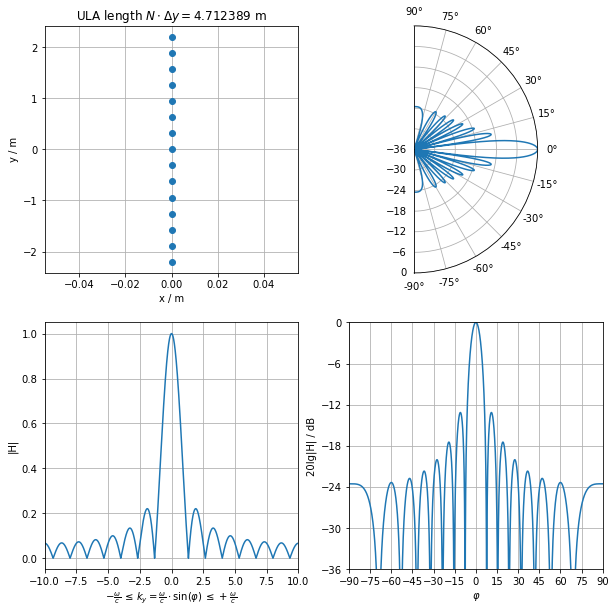

In [3]:
N = 15  # number of elements in ULA
phi_steer = 0  # deg
w = 10*343  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Downsteered Array -60deg, No Aliasing

interelement delay for the delay-and-sum beamforming processing
tau = 0.793207 ms


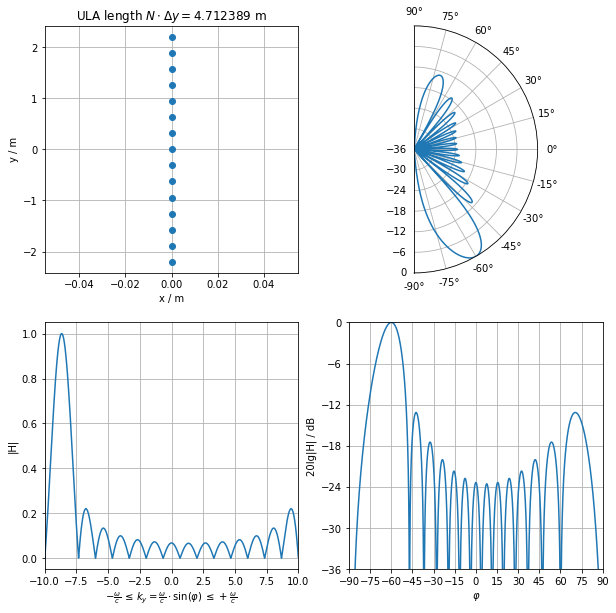

In [4]:
N = 15  # number of elements in ULA
phi_steer = -60  # deg
w = 10*343  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Endfire Array, No Aliasing

interelement delay for the delay-and-sum beamforming processing
tau = 0.915916 ms


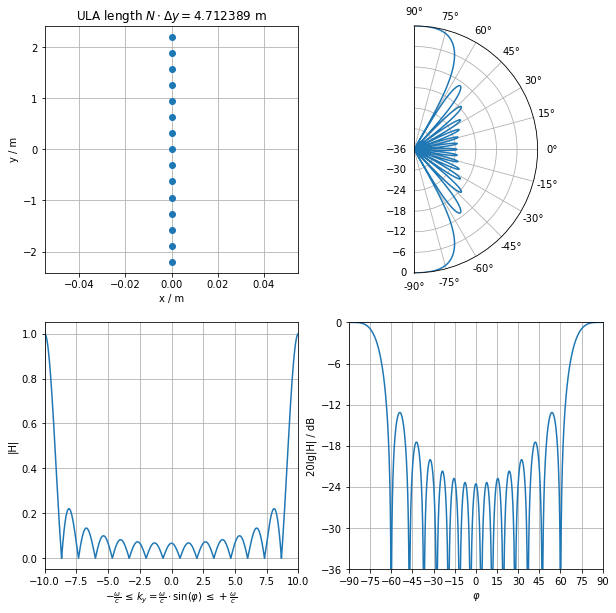

In [5]:
N = 15  # number of elements in ULA
phi_steer = -90  # deg
w = 10*343  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Broadside Array, Spatial Aliasing, Grating Lobes at +-90 deg

interelement delay for the delay-and-sum beamforming processing
tau = 0.000000 ms


/Users/fs446/opt/anaconda3/envs/mystiasp/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10


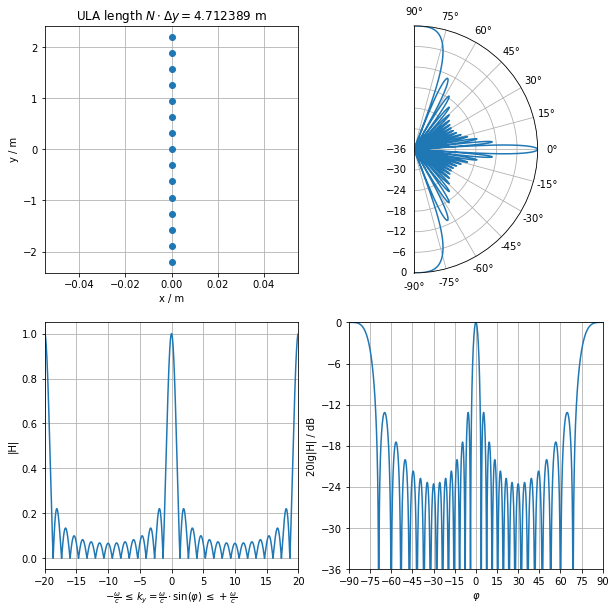

In [6]:
N = 15  # number of elements in ULA
phi_steer = 0  # deg
w = 10*343*2  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Broadside Array, Spatial Aliasing, Grating Lobes at +-90 deg and +-30 deg

interelement delay for the delay-and-sum beamforming processing
tau = 0.000000 ms
we have grating lobes within the visible region -> spatial aliasing occurs


/Users/fs446/opt/anaconda3/envs/mystiasp/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10


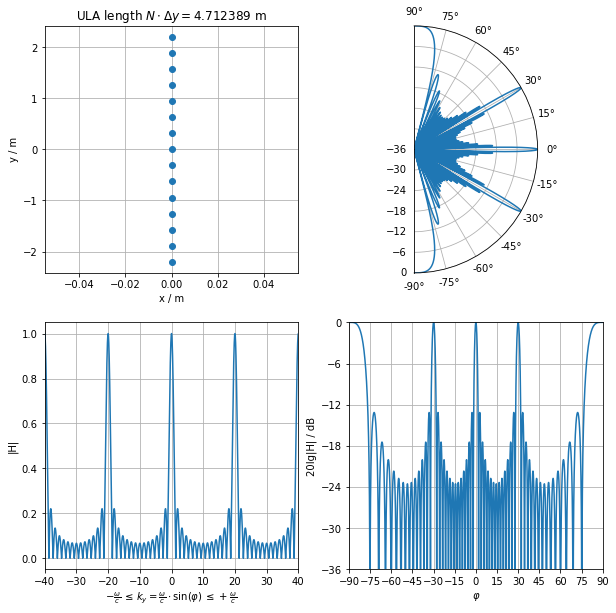

In [7]:
N = 15  # number of elements in ULA
phi_steer = 0  # deg
w = 10*343*4  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Downsteered Array to -45 deg, 3 Grating Lobes

interelement delay for the delay-and-sum beamforming processing
tau = 0.647651 ms
we have grating lobes within the visible region -> spatial aliasing occurs


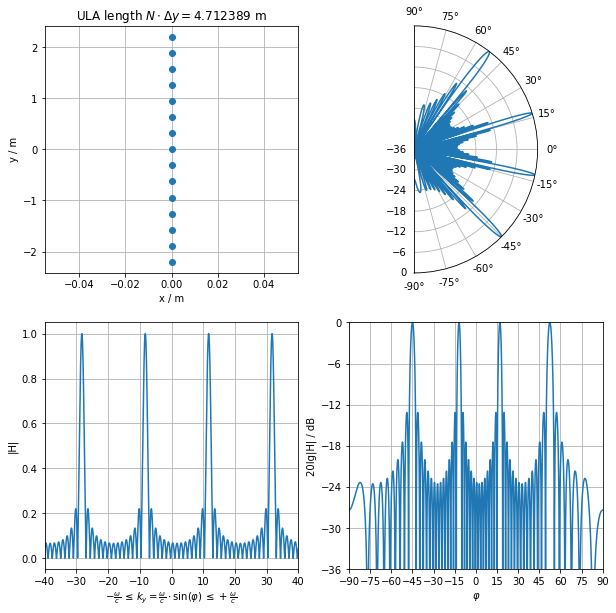

In [8]:
N = 15  # number of elements in ULA
phi_steer = -45  # deg
w = 10*343*4  # rad/s
dy = 2*np.pi/20  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

## Steered ULA with Same Length but Different Number of Elements and Thus Spacing 

steering works, no grating lobes

interelement delay for the delay-and-sum beamforming processing
tau = 0.061235 ms


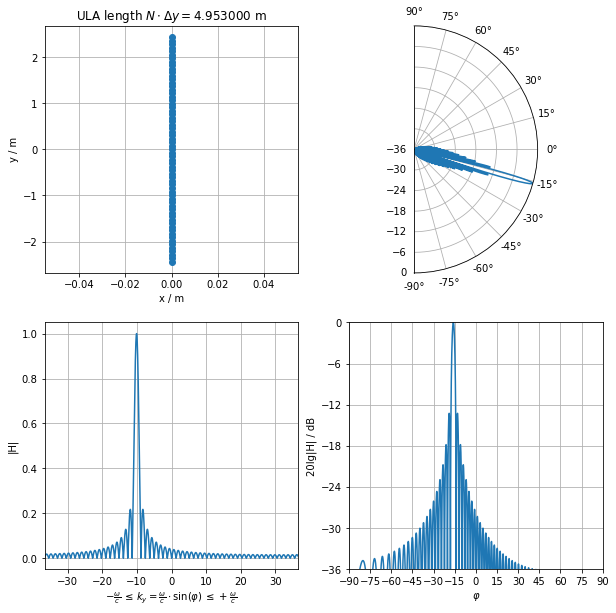

In [9]:
N = 65  # number of elements in ULA
phi_steer = -16  # deg
w = 2*np.pi*2000  # rad/s
dy = 3*2.54/100  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)

steering leads to additional 3 grating lobes, thus **receiving of transmitting direction is not unique**

interelement delay for the delay-and-sum beamforming processing
tau = 0.306174 ms
we have grating lobes within the visible region -> spatial aliasing occurs


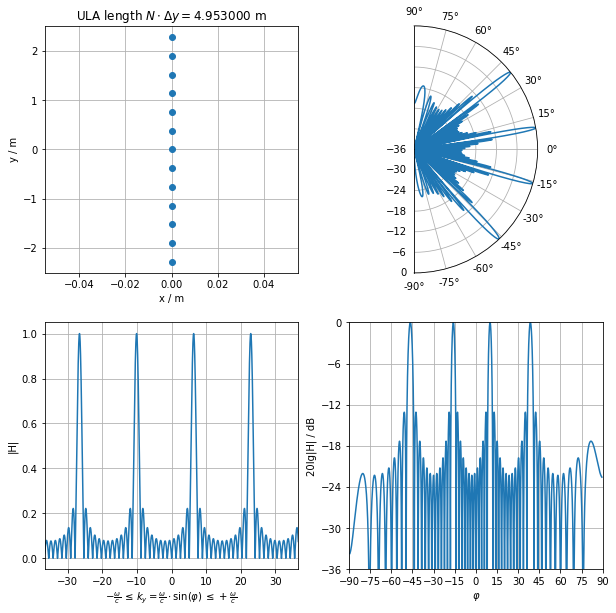

In [10]:
N = 13  # number of elements in ULA
phi_steer = -16  # deg
w = 2*np.pi*2000  # rad/s
dy = 15*2.54/100  # m

x = np.array([np.zeros(N), np.arange(N)*dy - (N-1)*dy/2]).T  # on y axis
plot_ula_farfield_directivity(x, phi_steer, w)